# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import seaborn as ns
import matplotlib.pyplot as plt
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\muham\AppData\Roaming\nltk_data...
[

True

In [2]:
# <td class="review-value ">Economy Class</td>
# <td class="review-value rating-no">no</td>
# <tr><td class="review-rating-header recommended">Recommended</td><td class="review-value rating-no">no</td></tr>
# <td class="review-value ">Premium Economy</td>
# <table class="review-ratings">

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
recommendation_list = []
seat_type = []

In [4]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    for eco in parsed_content.find_all('tr'):
        date_flown_cells = eco.find_all('td', {'class': 'review-rating-header cabin_flown'})
        
        for date_cell in date_flown_cells:
            next_td = date_cell.find_next_sibling('td')  
            if next_td:
                seat_type.append(next_td)

    all_reviews = parsed_content.find_all("td", {"class": ["review-value rating-no", "review-value rating-yes"]})
    
    for review in all_reviews:
        if "rating-no" in review["class"]:
            recommendation_list.append("No")
        elif "rating-yes" in review["class"]:
            recommendation_list.append("Yes")
        
    div_reviews = parsed_content.find_all('div', {'class': 'review-stats'})

    


print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
   ---> 1000 total reviews


In [5]:
len(recommendation_list), len(reviews), len(seat_type)

(1000, 1000, 1000)

In [29]:
df = pd.DataFrame()
df["reviews"] = reviews
df['Recommendation'] = recommendation_list
df['Seat Type'] = seat_type
df.head()

,reviews,Recommendation,Seat Type
0,✅ Trip Verified | I’ve flown with many airline...,No,[Economy Class]
1,✅ Trip Verified | I recently flew from New Y...,Yes,[Premium Economy]
2,Not Verified | BA business class in Europe h...,No,[Business Class]
3,✅ Trip Verified | Our flight started in Seattl...,No,[Economy Class]
4,✅ Trip Verified | British Airways Flight fro...,No,[Economy Class]


In [30]:
# df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [31]:
def cleaner(data):
    parts = str(data).split("|")
    if len(parts) > 1:
        return parts[1].strip()
    else:
        return None    

In [32]:
import spacy
nlp = spacy.load("en_core_web_sm")
def tokenize_text(data):
    doc = nlp(data)
    return [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]

In [33]:
df['reviews'] = df['reviews'].apply(lambda x: cleaner(x))

In [34]:
df.dropna(inplace=True)

In [35]:
text = ' '.join(df['reviews'])

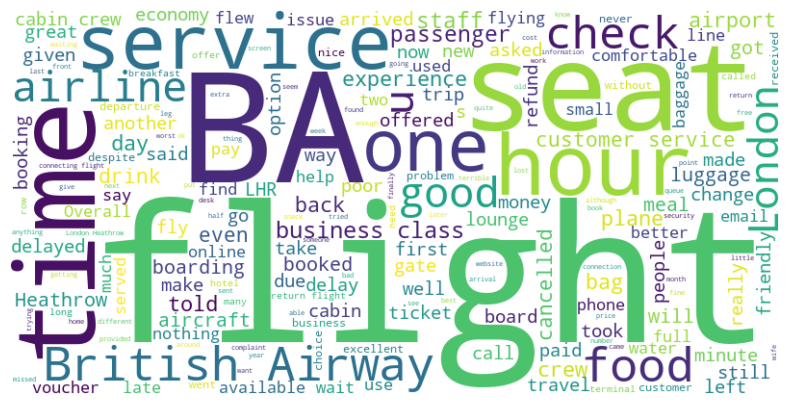

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(text), interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
from collections import Counter

In [38]:
all_words = [word for review in df['reviews'] for word in tokenize_text(review)]

In [39]:
word_count = Counter(all_words)
most_common_word = word_count.most_common(10)
words, freq = zip(*most_common_word)

common_word_list = list(words)
common_word_list
# common_word_list = [word for word, fre in most_common_word]
# print(common_word_list)

['flight',
 'ba',
 'service',
 'time',
 'london',
 'class',
 'crew',
 'british',
 'seat',
 'airways']

C:\Users\muham\AppData\Local\Temp\ipykernel_2160\2737619597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ns.barplot(x=words, y=freq, palette=colors)


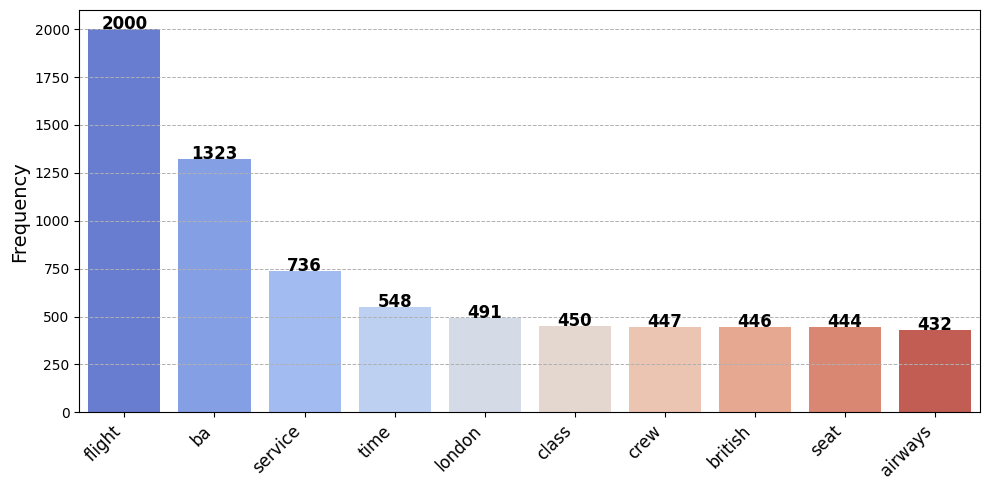

In [68]:
colors = ns.color_palette("coolwarm", len(words))

plt.figure(figsize=(10, 5))
ns.barplot(x=words, y=freq, palette=colors)

for i, v in enumerate(freq):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=12, fontweight='bold')

# plt.title("Top 10 Most Common Words", fontsize=16, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.xlabel(None)

plt.tight_layout() 
plt.show()

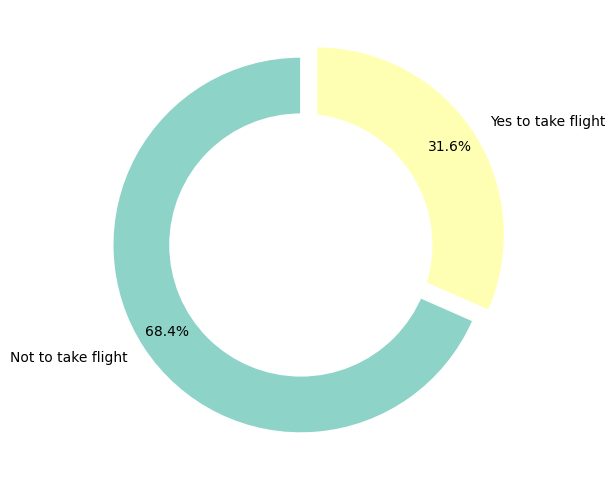

In [69]:
recommendation = df['Recommendation'].value_counts().reset_index()
recommendation.columns = ['Recommendation', 'count']
recommendation['count'] = (recommendation['count']/1000) * 100
recommendation['Recommendation'] = recommendation['Recommendation'].replace({'Yes': 'Yes to take flight', 'No': 'Not to take flight'})
colors = ns.color_palette("Set3", len(recommendation))
plt.figure(figsize=(10, 5))
plt.pie(
    x=recommendation['count'], 
    labels=recommendation['Recommendation'],
    startangle=90, 
    explode=[0, 0.1],
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white'}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
# plt.title("Recommendation Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()